# 1. Tidy Data 만들기
- 각 변수 (컬럼)는 각각의 열에 분리, 배치
- 각 관측치는 각각의 행에 분리, 배치
- 각 값은 개별 셀에 배치되어야 한다

pew.csv

미국의 퓨리서치센터의 소득, 종교의 관계를 나타내는 데이터

wide data -> long data

In [3]:
import pandas as pd

In [4]:
pew_df = pd.read_csv('./data/pew.csv')

In [5]:
pew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [6]:
pew_df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [7]:
pew_df.tail()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
13,Orthodox,13,17,23,32,32,47,38,42,46,73
14,Other Christian,9,7,11,13,13,14,18,14,12,18
15,Other Faiths,20,33,40,46,49,63,46,40,41,71
16,Other World Religions,5,2,3,4,2,7,3,4,4,8
17,Unaffiliated,217,299,374,365,341,528,407,321,258,597


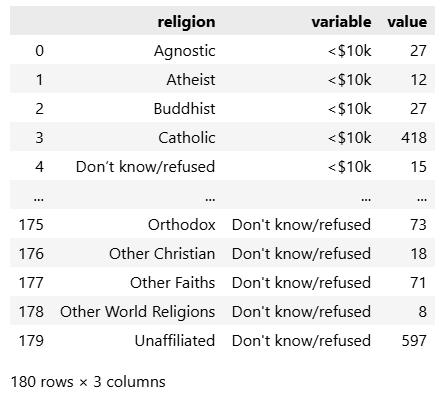

long data로 만들기

In [8]:
# pivoting
pew_df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


## melt()

- id_vars : 유지할 변수 리스트 (튜플, 행렬)
- value_vars : 피봇 되돌리기 값으로 쓰일 열 목록
- var_name : 만들어지는 새 컬럼의 이름
- value_name : 새 컬럼의 값의 컬럼 이름

In [9]:
# unpivoting
pew_df.melt(id_vars='religion')

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [10]:
pew_df.melt(id_vars='religion',
            var_name='income',
            value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


billboard.csv

여러개의 열을 이용한 melt

In [11]:
billboard_df = pd.read_csv('./data/billboard.csv')
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [12]:
billboard_df.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
id_vars = ['year', 'artist', 'track','time', 'date.entered']
b_melt_df = billboard_df.melt(id_vars=id_vars,
                            var_name='week',
                            value_name='rating')

b_melt_df.head()

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [14]:
ebola_df = pd.read_csv('./data/country_timeseries.csv')
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [15]:
ebola_df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [16]:
ebola_df.iloc[:5, [0, 1, 2, 10]]

,Date,Day,Cases_Guinea,Deaths_Guinea
0,1/5/2015,289,2776.0,1786.0
1,1/4/2015,288,2775.0,1781.0
2,1/3/2015,287,2769.0,1767.0
3,1/2/2015,286,NaN,NaN
4,12/31/2014,284,2730.0,1739.0


In [17]:
# 1. 값 (Cases_~, Deaths_~, id_vars=['Date', 'Day'])
ebola_long = ebola_df.melt(id_vars=['Date', 'Day'])
ebola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [18]:
# 2. 값 분할
variable_split = ebola_long['variable'].str.split('_')
type(variable_split)

pandas.core.series.Series

In [19]:
variable_split[:5]

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object

In [20]:
# variable_split[0][0]
# variable_split.str.get(0)

In [21]:
status_values = variable_split.str.get(0)  # cases, deaths
country_values = variable_split.str.get(1)  # country
type(status_values)

pandas.core.series.Series

In [22]:
status_values, country_values

(0        Cases
 1        Cases
 2        Cases
 3        Cases
 4        Cases
          ...  
 1947    Deaths
 1948    Deaths
 1949    Deaths
 1950    Deaths
 1951    Deaths
 Name: variable, Length: 1952, dtype: object,
 0       Guinea
 1       Guinea
 2       Guinea
 3       Guinea
 4       Guinea
          ...  
 1947      Mali
 1948      Mali
 1949      Mali
 1950      Mali
 1951      Mali
 Name: variable, Length: 1952, dtype: object)

In [23]:
# 컬럼 생성
ebola_long['status'] = status_values
ebola_long['country'] = country_values
ebola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


1 ~ 3 번을 빠르게 만들기

In [24]:
ebola_long_1 = ebola_df.melt(id_vars=['Date', 'Day'])
variable_split_1 = ebola_long_1['variable'].str.split('_', expand=True)
ebola_long_1[['status', 'country']] = variable_split_1
ebola_long_1

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


weather.csv

In [25]:
weather_df = pd.read_csv('./data/weather.csv')
weather_df.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# element에 tmax, tmin 중복 반복 -> 컬럼으로 가줘야할 듯
# day 묶어주기

In [27]:
# day 묶어주기 (unpivoting)
weather_melt = weather_df.melt(id_vars=['id', 'year', 'month', 'element'],
                               var_name='day',
                               value_name='temp')

weather_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


## pivot table

In [28]:
# element의 tmax, tmin 을 컬럼으로 생성(pivoting)
weather_tidy = weather_melt.pivot_table(index=['id', 'year', 'month', 'day'],
                                        columns='element',
                                        values='temp')

weather_tidy.head(10)

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2

In [29]:
weather_tidy_flat = weather_tidy.reset_index()
weather_tidy_flat.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


메소드 체이닝   
검증이 끝나면 체이닝을 이용해 줄여주기

In [30]:
weather_tidy = weather_melt.pivot_table(index=['id', 'year', 'month', 'day'],
                                        columns='element',
                                        values='temp').reset_index()
weather_tidy.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


# 2. apply()

함수를 시리즈나 데이터프레임에 적용하기


1. 사용자 정의 함수

`def my_sq(x):
    return x**2`

2. 데이터프레임.apply(my_sq)

In [31]:
def my_sq(x):
    return x**2

In [32]:
df = pd.DataFrame({'a' : [10, 20, 30],
                   'b': [20, 30, 40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [33]:
# dir(df)

In [34]:
df['a']**2   # dataframe도 요소별 연산 (벡터화된 연산)

0    100
1    400
2    900
Name: a, dtype: int64

In [35]:
my_sq(df['a'])

0    100
1    400
2    900
Name: a, dtype: int64

In [36]:
df['a'].apply(my_sq)  # 더 판다스 코드에 가까움

0    100
1    400
2    900
Name: a, dtype: int64

In [37]:
df.iloc[0]

a    10
b    20
Name: 0, dtype: int64

In [38]:
df.iloc[0].apply(my_sq)

a    100
b    400
Name: 0, dtype: int64

In [39]:
# 매개변수 2개 함수 정의
def my_exp(x, e):
    return x ** e

In [40]:
df['a'].apply(my_exp, e=3)

0     1000
1     8000
2    27000
Name: a, dtype: int64

In [41]:
df.iloc[1].apply(my_exp, e=4)

a    160000
b    810000
Name: 1, dtype: int64

In [42]:
def print_me(x):
    print(x)
    print(type(x))

dataframe.apply()

In [43]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
<class 'pandas.core.series.Series'>
0    20
1    30
2    40
Name: b, dtype: int64
<class 'pandas.core.series.Series'>


a    None
b    None
dtype: object

In [44]:
df.apply(print_me, axis=1)

a    10
b    20
Name: 0, dtype: int64
<class 'pandas.core.series.Series'>
a    20
b    30
Name: 1, dtype: int64
<class 'pandas.core.series.Series'>
a    30
b    40
Name: 2, dtype: int64
<class 'pandas.core.series.Series'>


0    None
1    None
2    None
dtype: object

# 월급 계산

In [45]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age' : [25, 45, 35, 32, 28],
    'Salary' : [5000, 7000, 6500, 5500, 6000]
}

df = pd.DataFrame(data)
df

,Name,Age,Salary
0,Alice,25,5000
1,Bob,45,7000
2,Charlie,35,6500
3,David,32,5500
4,Eva,28,6000


In [46]:
def age_category(age):
    if 20 <= age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    elif 40 <= age < 50:
        return '40대'
    else:
        return '범위 외'

In [47]:
# Category 컬럼으로 추가
df['Age_Category'] = df['Age'].apply(age_category)
df

,Name,Age,Salary,Age_Category
0,Alice,25,5000,20대
1,Bob,45,7000,40대
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


In [48]:
def salary_level(salary):
    if salary < 5500:
        return '낮음'
    elif salary < 6500:
        return '보통'
    else:
        return '높음'

In [49]:
df['Salary_Level'] = df['Salary'].apply(salary_level)
df

,Name,Age,Salary,Age_Category,Salary_Level
0,Alice,25,5000,20대,낮음
1,Bob,45,7000,40대,높음
2,Charlie,35,6500,30대,높음
3,David,32,5500,30대,보통
4,Eva,28,6000,20대,보통


In [50]:
# 보너스 
# def calc_bonus(salary):
#     return salary * 0.30

df['Bonus'] = df['Salary'].apply(lambda s: s * 0.30)
df

,Name,Age,Salary,Age_Category,Salary_Level,Bonus
0,Alice,25,5000,20대,낮음,1500.0
1,Bob,45,7000,40대,높음,2100.0
2,Charlie,35,6500,30대,높음,1950.0
3,David,32,5500,30대,보통,1650.0
4,Eva,28,6000,20대,보통,1800.0


In [51]:
df['Total'] = df[['Salary', 'Bonus']].apply(lambda t: t['Salary'] + t['Bonus'], axis=1)
df

,Name,Age,Salary,Age_Category,Salary_Level,Bonus,Total
0,Alice,25,5000,20대,낮음,1500.0,6500.0
1,Bob,45,7000,40대,높음,2100.0,9100.0
2,Charlie,35,6500,30대,높음,1950.0,8450.0
3,David,32,5500,30대,보통,1650.0,7150.0
4,Eva,28,6000,20대,보통,1800.0,7800.0


# 3. 데이터 연결/결합하기
concat() + axis=

## 3-1. 행으로 연결

In [52]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')
df1, df2, df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

column 이 동일해야 함!

In [53]:
total_df = pd.concat([df1, df2, df3])
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [54]:
total_df.loc[3]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [55]:
total_df.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,0,a4,b4,c4,d4
5,1,a5,b5,c5,d5
6,2,a6,b6,c6,d6
7,3,a7,b7,c7,d7
8,0,a8,b8,c8,d8
9,1,a9,b9,c9,d9


In [56]:
# 넣을때 부터 인덱스는 적용 x
total_df = pd.concat([df1, df2, df3], ignore_index=True)
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [57]:
add_s = pd.Series(['a100', 'b100', 'c100', 'd100'])
type(add_s)

pandas.core.series.Series

In [58]:
pd.concat([df1, add_s], ignore_index=True)  # Series는 컬럼으로 붙이는게 default

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,NaN,NaN,NaN,NaN,a100
5,NaN,NaN,NaN,NaN,b100
6,NaN,NaN,NaN,NaN,c100
7,NaN,NaN,NaN,NaN,d100


In [59]:
# DataFrame으로 만들어서 붙이는게 good!
new_row = pd.DataFrame(data = [['a100', 'b100', 'c100', 'd100']],
                        columns=['A', 'B', 'C', 'D'])

pd.concat([df1, new_row], ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a100,b100,c100,d100


In [60]:
new_row

,A,B,C,D
0,a100,b100,c100,d100


concat()의 기준은 columns 값!   
연결하려는 데이터프레임의 columns가 동일해야 한다.

In [61]:
add_s = pd.Series(['a100', 'b100', 'c100', 'd100'], index=['A', 'B', 'C', 'D'])
add_s

A    a100
B    b100
C    c100
D    d100
dtype: object

In [62]:
empty_df = pd.DataFrame(columns=['A', 'B', 'C', 'D'])

empty_df.loc[0] = add_s
empty_df

,A,B,C,D
0,a100,b100,c100,d100


In [63]:
pd.concat([df1, empty_df], ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a100,b100,c100,d100


## 3-2 열로 연결
concat([], axis=1)  # columns

In [64]:
col_concat = pd.concat([df1, df2, df3], axis='columns')

In [65]:
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [66]:
# col 추가
col_concat['new_col'] = ['n1', 'n2', 'n3', 'n4']  # col의 len이 일치해야 함
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [67]:
# ignore_index=
# Series 추가

In [68]:
col_concat_1 = pd.concat([df1, df2, df3], axis='columns', ignore_index=True)
col_concat_1

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [69]:
add_s = pd.Series(['a100', 'b100', 'c100', 'd100'])
add_s

0    a100
1    b100
2    c100
3    d100
dtype: object

In [70]:
empty_df_1 = pd.DataFrame()

empty_df_1['new_col'] = add_s
empty_df_1

,new_col
0,a100
1,b100
2,c100
3,d100


In [71]:
pd.concat([col_concat_1, empty_df_1], axis='columns')

,0,1,2,3,4,5,6,7,8,9,10,11,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,a100
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,b100
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,c100
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,d100


## 3-3. 병합
concat(join='inner' / 'outer')

In [72]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [73]:
pd.concat([df1, df2, df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [74]:
pd.concat([df1, df2, df3], join='inner').shape

(12, 0)

In [75]:
pd.concat([df1, df3], join='inner')  # 컬럼 이름 기준 같은 것만 나옴

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [76]:
# 열 방향으로 병합 ->  index

In [77]:
df1.index = [0, 1, 2, 3]
df2.index = [4, 5, 6, 7]
df3.index = [0, 2, 5, 7]

In [78]:
pd.concat([df1, df2, df3], axis='columns')

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a10,b10,c10,d10
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,a11,b11,c11,d11


In [79]:
pd.concat([df1, df2, df3], axis='columns', join='inner')

,A,B,C,D,E,F,G,H,A,C,F,H


In [80]:
pd.concat([df1, df3], axis='columns', join='inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


# 열병합 연습

In [81]:
# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})

In [82]:
pd.concat([january, february], axis='columns')

,Date,Sales,Date,Sales
0,2023-01-01,200,2023-02-01,300
1,2023-01-02,250,2023-02-02,350


In [83]:
january['Month'] = 'Jan'
february['Month'] = 'Feb'

month_df = pd.concat([january, february], ignore_index=True)
month_df = month_df[['Month', 'Date', 'Sales']]
month_df.loc[month_df['Month'].duplicated(), 'Month'] = ''

month_df

,Month,Date,Sales
0,Jan,2023-01-01,200
1,,2023-01-02,250
2,Feb,2023-02-01,300
3,,2023-02-02,350


In [84]:
# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})

In [85]:
pd.concat([
    store_a.set_index('Date'),
    store_b.set_index('Date')
], axis=1).reset_index()

,Date,Sales_A,Sales_B
0,2023-01-01,200,300
1,2023-01-02,250,350


In [86]:
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})

In [87]:
store_df = pd.concat([store_c.set_index('Date'), store_d.set_index('Date')], axis='columns', join='outer')
store_df

,Sales_C,Sales_D
Date,,
2023-01-01,220.0,NaN
2023-01-03,280.0,370.0
2023-01-02,NaN,330.0


In [88]:
store_df.sort_index()

,Sales_C,Sales_D
Date,,
2023-01-01,220.0,NaN
2023-01-02,NaN,330.0
2023-01-03,280.0,370.0


# 파일로 결합하기

In [89]:
from pathlib import Path

data_files = Path('./').glob('data/billboard-by_week/billboard-*.csv')

In [90]:
b_data_files = sorted(list(data_files))
len(b_data_files)

76

In [91]:
[b_data_file for b_data_file in b_data_files]

[WindowsPath('data/billboard-by_week/billboard-01.csv'),
 WindowsPath('data/billboard-by_week/billboard-02.csv'),
 WindowsPath('data/billboard-by_week/billboard-03.csv'),
 WindowsPath('data/billboard-by_week/billboard-04.csv'),
 WindowsPath('data/billboard-by_week/billboard-05.csv'),
 WindowsPath('data/billboard-by_week/billboard-06.csv'),
 WindowsPath('data/billboard-by_week/billboard-07.csv'),
 WindowsPath('data/billboard-by_week/billboard-08.csv'),
 WindowsPath('data/billboard-by_week/billboard-09.csv'),
 WindowsPath('data/billboard-by_week/billboard-10.csv'),
 WindowsPath('data/billboard-by_week/billboard-11.csv'),
 WindowsPath('data/billboard-by_week/billboard-12.csv'),
 WindowsPath('data/billboard-by_week/billboard-13.csv'),
 WindowsPath('data/billboard-by_week/billboard-14.csv'),
 WindowsPath('data/billboard-by_week/billboard-15.csv'),
 WindowsPath('data/billboard-by_week/billboard-16.csv'),
 WindowsPath('data/billboard-by_week/billboard-17.csv'),
 WindowsPath('data/billboard-by

In [92]:
b_01 = pd.read_csv(b_data_files[0])
b_01

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk1,86.0
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk1,85.0
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk1,95.0
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk1,99.0


In [93]:
list_b_df = []  # 전체를 담을 리스트
for b_data_file in b_data_files:
    df = pd.read_csv(b_data_file)
    list_b_df.append(df)
    
len(list_b_df)

76

In [94]:
type(list_b_df[0])

pandas.core.frame.DataFrame

In [95]:
final_df = pd.concat(list_b_df)
final_df.shape

(24092, 7)

In [96]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [97]:
sales_data

,CustomerID,Date,Amount
0,101,2023-01-01,250
1,102,2023-01-03,300
2,103,2023-01-05,150
3,104,2023-01-07,400


In [98]:
customer_data

,CustomerID,Name,Region
0,101,Alice,North
1,102,Bob,South
2,103,Charlie,East
3,105,Eva,West


In [99]:
pd.merge(sales_data, customer_data, on="CustomerID")  # inner

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [100]:
pd.merge(sales_data, customer_data, on="CustomerID", how='outer')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [101]:
pd.merge(sales_data, customer_data, on="CustomerID", how='left')  # left / right -> sales_data / customer_data

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East
3,104,2023-01-07,400,NaN,NaN


# 4. 그룹 연산하기

groupby(), aggregation, 집계

In [102]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [103]:
# 국가 개수
df['country'].unique().shape

(142,)

In [104]:
df.groupby('country')['lifeExp'].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

count(), size(), mean(), std()   
quantile()   
max(), min(), sum(), var(), describe()

## numpy
np.max(), np.sum(), np.var()

In [105]:
import numpy as np

In [106]:
df.groupby('continent')['lifeExp'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: lifeExp, dtype: int64

In [107]:
# 여러개를 적용해서 합할 때 agg()
df.groupby('continent')['lifeExp'].agg([np.mean, np.std, np.min, np.max])

C:\Users\Admin\AppData\Local\Temp\ipykernel_16056\139797375.py:2: FutureWarning: The provided callable <function mean at 0x000002C5BE03DC60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('continent')['lifeExp'].agg([np.mean, np.std, np.min, np.max])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16056\139797375.py:2: FutureWarning: The provided callable <function std at 0x000002C5BE03DDA0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('continent')['lifeExp'].agg([np.mean, np.std, np.min, np.max])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16056\139797375.py:2: FutureWarning: The provided callable <function min at 0x000002C5BE03D3A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided cal

,mean,std,min,max
continent,,,,
Africa,48.865330,9.150210,23.599,76.442
Americas,64.658737,9.345088,37.579,80.653
Asia,60.064903,11.864532,28.801,82.603
Europe,71.903686,5.433178,43.585,81.757
Oceania,74.326208,3.795611,69.120,81.235


In [108]:
df.groupby('continent').agg(
    {
        'lifeExp':'mean',
        'pop':'median',
        'gdpPercap':'median'
    }
)

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,1192.138217
Americas,64.658737,6227510.0,5465.509853
Asia,60.064903,14530830.5,2646.786844
Europe,71.903686,8551125.0,12081.749115
Oceania,74.326208,6403491.5,17983.303955
